In [1]:
from google.colab import files

In [2]:
data = files.upload()

Saving vgsales.csv to vgsales.csv


In [37]:
import pandas as pd 

In [38]:
sales = pd.read_csv('vgsales.csv')

In [39]:
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
sales.shape

(16598, 11)

In [41]:
sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [42]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [43]:
sales.sort_values('Year')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


In [44]:
sales['Year'] = sales['Year'].fillna(method='bfill')

In [45]:
sales['Year'].isna().sum()

0

In [46]:
sales['Year'].iloc[16307]

2003.0

In [47]:
sales['Publisher'].isna().sum()

58

In [48]:
sales['Publisher'].mode()[0]

'Electronic Arts'

In [55]:
sales['Publisher'].fillna('Electronic Arts', inplace=True)
sales['Publisher'] = sales['Publisher'].replace('Unknown', 'Electronic Arts')

In [56]:
sales['Publisher'].isna().sum()

0

In [57]:
sales['Publisher'].iloc[16307]

'Electronic Arts'

In [58]:
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [59]:
sales.iloc[16307]

Rank                      16310
Name              Freaky Flyers
Platform                     GC
Year                     2003.0
Genre                    Racing
Publisher       Electronic Arts
NA_Sales                   0.01
EU_Sales                    0.0
JP_Sales                    0.0
Other_Sales                 0.0
Global_Sales               0.01
Name: 16307, dtype: object

In [61]:
corr = sales.corr()

<ipython-input-61-e73a5f1cc519>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr()


<Axes: >

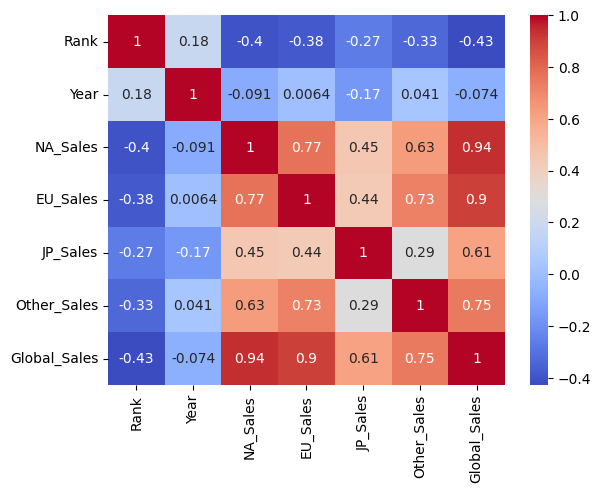

In [62]:
sns.heatmap(corr, annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Global proce vs Year')

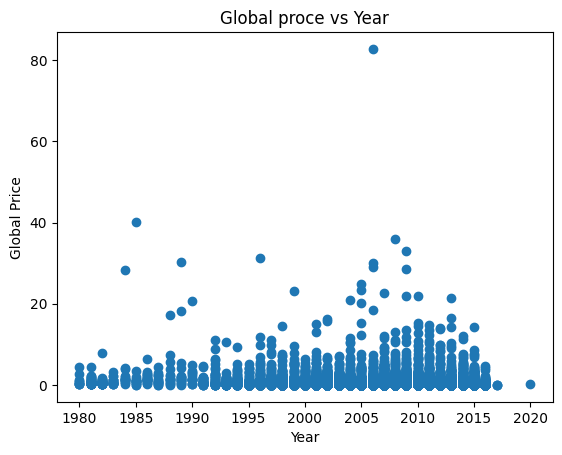

In [65]:
plt.scatter(sales['Year'], sales['Global_Sales'])
plt.xlabel("Year")
plt.ylabel('Global Price')
plt.title('Global proce vs Year')

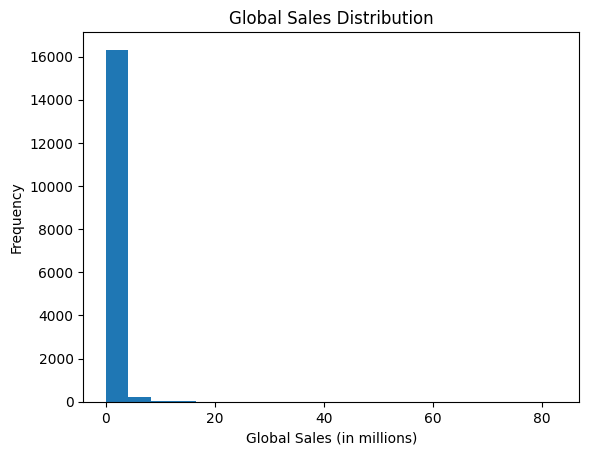

In [67]:
plt.hist(sales['Global_Sales'], bins=20)
plt.title('Global Sales Distribution')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

In [74]:
sales.to_csv('Clean_vgsales.csv')

In [75]:
sales = pd.read_csv('Clean_vgsales.csv')

In [76]:
sales.shape

(16598, 12)

In [94]:
sales.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [95]:
sales.columns

Index(['Unnamed: 0', 'Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [100]:
sales = sales.drop(['Unnamed: 0'], axis=1)

In [101]:
cate_col = sales.select_dtypes(include='object')
cate_col

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo
...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision
16596,Know How 2,DS,Puzzle,7G//AMES


In [117]:
num_col = sales.select_dtypes(include=('int64', 'float'))
num_col = num_col.drop(['Global_Sales'],axis=1)

In [182]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [119]:
one = OneHotEncoder()
one_cate = one.fit_transform(cate_col)

In [120]:
from scipy.sparse import hstack

In [121]:
X = hstack([one_cate, num_col])

In [152]:
X

<16598x12120 sparse matrix of type '<class 'numpy.float64'>'
	with 138819 stored elements in COOrdinate format>

In [123]:
Y = sales['Global_Sales']

In [124]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.18, random_state=42) 

In [127]:
Lr = LinearRegression()

In [129]:
model = Lr.fit(train_x, train_y)

In [131]:
y_pred = model.predict(test_x)

In [138]:
acuracy = r2_score(test_y, y_pred)
acuracy

0.9999406110519818

In [140]:
mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)

In [144]:
print('mse:',mse)
print('mae',mae)

mse: 0.0002583413716556738
mae 0.010218442128129208


In [192]:
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [195]:
sales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')